In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [4]:
# Define the model
model = Sequential([
  Dense(16,activation='relu',input_shape=(1,)),
  Dense(32,activation='relu'),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(16, activation='relu'),
  Dense(1, activation='linear')
])



In [7]:
# generate test and training data

def f(x):
    return 5 * x**2 + 10 * x - 2

x = np.linspace(-10, 10, 1000).reshape(-1, 1)
y = f(x) + np.random.randn(*x.shape) * 5 

# Shuffle the data
indices=np.random.permutation(len(x))
x=x[indices]
y=y[indices]

x_train, y_train = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]

In [11]:
# Train the model
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
history = model.fit(x_train, y_train, epochs=1000, batch_size=32, validation_split=0.1,verbose=1)


Epoch 1/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 45.4905 - mae: 5.1486 - val_loss: 35.4874 - val_mae: 4.8408
Epoch 2/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 33.6984 - mae: 4.6119 - val_loss: 33.7833 - val_mae: 4.7489
Epoch 3/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 32.0690 - mae: 4.4607 - val_loss: 48.4234 - val_mae: 5.7124
Epoch 4/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 30.3910 - mae: 4.4484 - val_loss: 34.1425 - val_mae: 4.7338
Epoch 5/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 27.3117 - mae: 4.0908 - val_loss: 35.1127 - val_mae: 4.8652
Epoch 6/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 29.4957 - mae: 4.3405 - val_loss: 34.8416 - val_mae: 4.7141
Epoch 7/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 31.0126 - mae: 4.4242 - val_loss: 38.1274 - val_mae: 5.1363
Epoch 8/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 38.3357 - mae: 4.9701 - val_loss: 31.2788 - val_mae: 4.5664
Epoch 9/1000
23/23 ━━━━━━━━━━━━━━━━━━

In [12]:
# evaluate model
loss, mae = model.evaluate(x_test, y_test, verbose=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 43.8819 - mae: 5.2911 


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


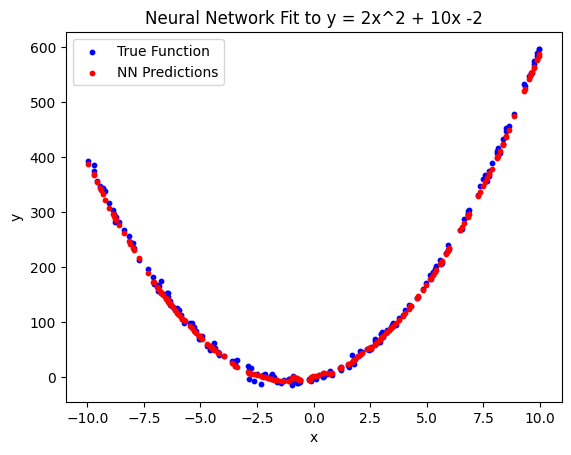

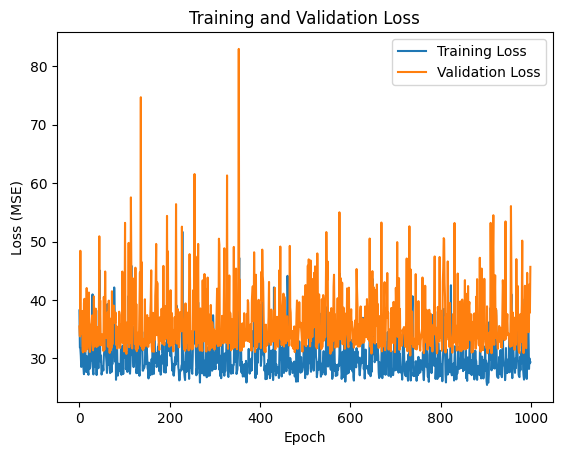

In [ ]:

# 6. Make Predictions
y_pred = model.predict(x_test)

# 7. Visualize Results
plt.scatter(x_test, y_test, label='True Function', color='blue', s=10)
plt.scatter(x_test, y_pred, label='NN Predictions', color='red', s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Fit to y = 2x^2 + 10x -2')
plt.legend()
plt.show()

# 8. Plot Training History
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()